# NT1 - Data Oganizer for geotechnical data analysis and plotting

## Query Data Organizer for E, sigma_c, tau, then write to lists and show report tables 

In [775]:
# open Data Organizer
from DataOrganizer import CouchbaseSelector
db = CouchbaseSelector('localhost','geotechnical')

In [776]:
# set up python ecosystem
import json
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm

In [777]:
# query Data Organizer records for 'parameter' = E 
# sorting by borehole_code and sample_depth

# initialize variables
data_E=[]

parameter = 'E'
fields = ['borehole_code','sample_description','lithology', 'sample_depth_top_m', 
          'value', 'value_unit', 'measurement_convention', 'test_type']
selector = {'project_code': 'NT1', 'data_source': 'Laboratory'}
sort = ['borehole_code','sample_depth_top_m']

# write rec to data_E if measurement_convention is E50 or is blank (assued to be E50)
# if value for E is blank, replace with 'NaN'    
for rec in db.get_parameter(parameter, fields, selector, sort):
    try:
      type(float(rec['value']))         
    except:
      rec['value'] = 'NaN'  ##ToDo JK 2017.06.28: this statement suddenly resulted in all values being NaN???
    
    if rec['measurement_convention'] != 'Es':
      data_E.append(rec)

print('count for E: '+str(len(data_E)))    # record count for checking

count for E: 54


In [778]:
# write returned Data Organizer list to a pandas data frame and display as html
data_E_df = pd.DataFrame(data=data_E)
data_E_df.columns = [u'Borehole', u'Lithology', u'Measurement', u'Depth', u'Sample', u'Test', u'Value', u'Unit']
display(HTML('<h4>NT1 data - E </h3>'))
display(HTML(data_E_df.to_html()))                                                             
##display(HTML(data_E_df.to_html(formatters={'value':lambda x: u'{:06.2f}'.format(float(x))})))
# order columns of report tables to something more suitable                                             #ToDo JK

,Borehole,Lithology,Measurement,Depth,Sample,Test,Value,Unit
0,NT1-1,Conglomerate,,27.10,Basic Design,E measured during uniaxial compression,3352.00,MPa
1,NT1-1,Conglomerate,,61.50,Basic Design,E measured during uniaxial compression,3532.00,MPa
2,NT1-11,Sandstone,,15.65,Basic Design,E measured during uniaxial compression,3142.00,MPa
3,NT1-14,Red Sandstone,E50,28.90,Construction Design,E measured during uniaxial compression,13200.00,MPa
4,NT1-14,Red Sandstone,E50,36.80,Construction Design,E measured during uniaxial compression,51400.00,MPa
5,NT1-14,Red Sandstone,E50,37.30,Construction Design,E measured during uniaxial compression,19700.00,MPa
6,NT1-14,Red Sandstone,E50,37.30,Construction Design,E measured during uniaxial compression,17800.00,MPa
7,NT1-14,Red Sandstone,E50,56.80,Construction Design,E measured during uniaxial compression,22100.00,MPa
8,NT1-15,Siltstone,E50,32.20,Construction Design,E measured during uniaxial compression,4170.00,MPa
9,NT1-15,Siltstone,E50,36.08,Construction Design,E measured during triaxial compression,6867.00,MPa


In [779]:
# query Data Organizer records for 'parameter' = sigma_c
# sorting by borehole_code and sample_depth

# initialize variables
data_sigma_c=[]

parameter = 'sigma_c'
fields = ['borehole_code','sample_description','lithology', 'sample_depth_top_m', 
          'value', 'value_unit', 'test_parameters', 'test_type']
selector = {'project_code': 'NT1','data_source': 'Laboratory'}
sort = ['borehole_code','sample_depth_top_m']

# write selected fields to lists
# reduce 'test_parameter' to show only value of first parameter
for rec in db.get_parameter(parameter, fields, selector, sort):
    try:
      type(float(rec['value']))         
    except:
      rec['value'] = 'NaN'
    
    rec['test_parameters'] = rec['test_parameters'][0]['value']
    #print rec['test_parameters'][0]['value']

    data_sigma_c.append(rec)
    
print('count for sigma_c: '+str(len(data_sigma_c)))    # record count for checking

count for sigma_c: 60


In [780]:
# write returned Data Organizer list to a pandas data frame and display as html
data_sigma_c_df = pd.DataFrame(data=data_sigma_c)
data_sigma_c_df.columns = [u'Borehole',u'Lithology',u'Depth',u'Sample',u's3',u'Test',u'Value',u'Unit']
display(HTML('<h4>NT1 data - sigma_c </h4>'))
display(HTML(data_sigma_c_df.to_html()))

,Borehole,Lithology,Depth,Sample,s3,Test,Value,Unit
0,NT1-1,Conglomerate,27.10,Basic Design,,Uniaxial compression,86.82,MPa
1,NT1-1,Conglomerate,61.50,Basic Design,,Uniaxial compression,75.15,MPa
2,NT1-11,Sandstone,15.65,Basic Design,,Uniaxial compression,85.02,MPa
3,NT1-14,Red Sandstone,28.90,Construction Design,3.00,Triaxial compression,127.17,MPa
4,NT1-14,Red Sandstone,28.90,Construction Design,5.00,Triaxial compression,128.55,MPa
5,NT1-14,Red Sandstone,28.90,Construction Design,,Uniaxial compression,56.01,MPa
6,NT1-14,Red Sandstone,28.90,Construction Design,1.00,Triaxial compression,90.54,MPa
7,NT1-14,Red Sandstone,36.80,Construction Design,,Uniaxial compression,106.68,MPa
8,NT1-14,Red Sandstone,37.30,Construction Design,,Uniaxial compression,78.68,MPa
9,NT1-14,Red Sandstone,37.30,Construction Design,,Uniaxial compression,126.68,MPa


In [781]:
# query Data Organizer records for 'parameter' = tau
# sorting by borehole_code and sample_depth

# initialize variables
data_tau=[]

parameter = 'tau'
fields = ['borehole_code','sample_description','lithology', 'sample_depth_top_m', 
          'value', 'value_unit', 'measurement_convention', 'test_parameters', 'test_type']
selector = {'project_code': 'NT1','data_source': 'Laboratory'}
sort = ['borehole_code','sample_depth_top_m']

# write selected fields to lists
# reduce 'test_parameter' to show only value of first parameter
for rec in db.get_parameter(parameter, fields, selector, sort):
    try:
      type(float(rec['value']))         
    except:
      rec['value'] = 'NaN'
    
    rec['test_parameters'] = rec['test_parameters'][0]['value']  #Fix - should write to new key           #ToDo JK

    if rec['measurement_convention'] == 'Peak strength':  #tmp - should handle by plotting            #ToDo JK
      data_tau.append(rec)
    
print('count for tau: '+str(len(data_tau)))    # record count for checking

count for tau: 36


In [782]:
# write returned Data Organizer list to a pandas data frame and display as html
data_tau_df = pd.DataFrame(data=data_tau)
data_tau_df.columns = [u'Borehole', u'Lithology', u'Measurement', u'Depth', u'Sample', u's3', u'Test', u'Value', u'Unit']
display(HTML('<h4>NT1 data - tau </h4>'))
display(HTML(data_tau_df.to_html()))

,Borehole,Lithology,Measurement,Depth,Sample,s3,Test,Value,Unit
0,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.40,Direct shear,0.20,MPa
1,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.80,Direct shear,0.34,MPa
2,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.40,Direct shear,0.18,MPa
3,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.20,Direct shear,0.14,MPa
4,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.80,Direct shear,0.37,MPa
5,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.80,Direct shear,0.37,MPa
6,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.20,Direct shear,0.11,MPa
7,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.80,Direct shear,0.41,MPa
8,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.20,Direct shear,0.07,MPa
9,Diversion Tunnel,Sheared Mudstone,Peak strength,,Construction Design,0.20,Direct shear,0.14,MPa


## Plot histograms for E50 data

In [783]:
# prepare E values for histogram 
# input: data_E

data_E_sel=[]

# select testing results from Basic Design
for item in data_E:
    if (item['value']) != 'NaN':
        if (item['sample_description']) == 'Basic Design':
            data_E_sel.append(float(item['value']))
    
print('count for selected E: '+str(len(data_E_sel)))    # record count for checking

count for selected E: 21


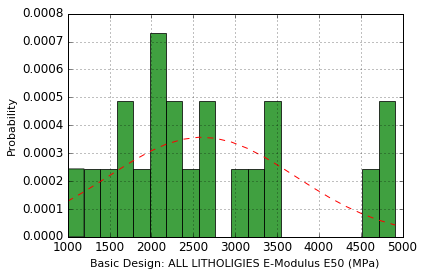

mean = 2603
standard deviation = 1117


In [784]:
# plot histogram of all E50 values
# input: data_e containing 'values' of 'parameter' E

# input: E containing 'values' of 'parameter' E
E = data_E_sel

# plot histogram of E values for all rock lithologies
#   plt.hist(values, number of bins, additional named parameters)
hist,bin_edges,patches = plt.hist(E, 20, normed=1, facecolor='green', alpha=0.75)

# just guessing at distribution
#mu, sigma = 15000, 10000
#y = mlab.normpdf( bin_edges, mu, sigma)
#l = plt.plot(bin_edges, y, 'b--', linewidth=1)

# calculate distribution of E values using scipy
param = norm.fit(E) 
# now, param[0] and param[1] are the mean and the standard deviation of the fitted distribution
y = mlab.normpdf( bin_edges, param[0], param[1])
ll = plt.plot(bin_edges, y, 'r--', linewidth=1)

# plot axis labels and grid
plt.ylabel('Probability',fontsize=11)
plt.xlabel('Basic Design: ALL LITHOLIGIES E-Modulus E50 (MPa)',fontsize=11)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)  
plt.grid(True)
plt.show()

print('mean = '+str(format(param[0],'.0f')))
print('standard deviation = '+str(format(param[1],'.0f')))

In [785]:
# prepare E values for histogram 
# input: data_E

data_E_sel=[]

# select testing results from Construction Design
for item in data_E:
  if (item['value']) != 'NaN':
    if (item['sample_description']) == 'Construction Design':
      data_E_sel.append(float(item['value']))
    
print('count for selected E: '+str(len(data_E_sel)))    # record count for checking

count for selected E: 29


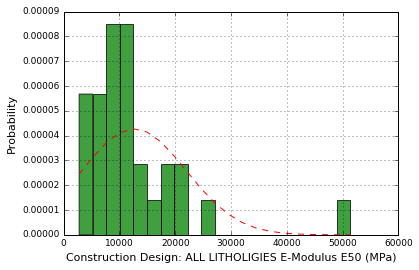

mean = 12629
standard deviation = 9334


In [786]:
# plot histogram of all E50 values
# input: data_e containing 'values' of 'parameter' E

# input: E containing 'values' of 'parameter' E
E = data_E_sel

# plot histogram of E values for all rock lithologies
#   plt.hist(values, number of bins, additional named parameters)
hist,bin_edges,patches = plt.hist(E, 20, normed=1, facecolor='green', alpha=0.75)

# just guessing at distribution
#mu, sigma = 15000, 10000
#y = mlab.normpdf( bin_edges, mu, sigma)
#l = plt.plot(bin_edges, y, 'b--', linewidth=1)

# calculate distribution of E values using scipy
param = norm.fit(E) 
# now, param[0] and param[1] are the mean and the standard deviation of the fitted distribution
y = mlab.normpdf( bin_edges, param[0], param[1])
ll = plt.plot(bin_edges, y, 'r--', linewidth=1)

# plot axis labels and grid
plt.ylabel('Probability',fontsize=11)
plt.xlabel('Construction Design: ALL LITHOLIGIES E-Modulus E50 (MPa)',fontsize=11)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)  

plt.grid(True)
plt.show()

print('mean = '+str(format(param[0],'.0f')))
print('standard deviation = '+str(format(param[1],'.0f')))

In [787]:
# prepare E values for selected lithologies 
# input: data_E

dict_E_basic={}
dict_E_const={}

def select_by_lithology(data, lithology, dict, sample_description):
  dict[lithology]=[]

  # select testing results from Construction Design
  for item in data:
    if (item['value']) != 'NaN':
      if (item['sample_description']) == sample_description:
        if (item['lithology']) == lithology:
            dict[lithology].append(float(item['value']))
        
select_by_lithology(data_E, 'Red Sandstone', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Sandstone', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Siltstone', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Mudstone', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Conglomerate', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Clay', dict_E_const, 'Construction Design')
select_by_lithology(data_E, 'Sheared Mudstone', dict_E_const, 'Construction Design')

select_by_lithology(data_E, 'Red Sandstone', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Sandstone', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Siltstone', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Mudstone', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Conglomerate', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Clay', dict_E_basic, 'Basic Design')
select_by_lithology(data_E, 'Sheared Mudstone', dict_E_basic, 'Basic Design')

#print(dict_E_const)
#print(dict_E_basic)

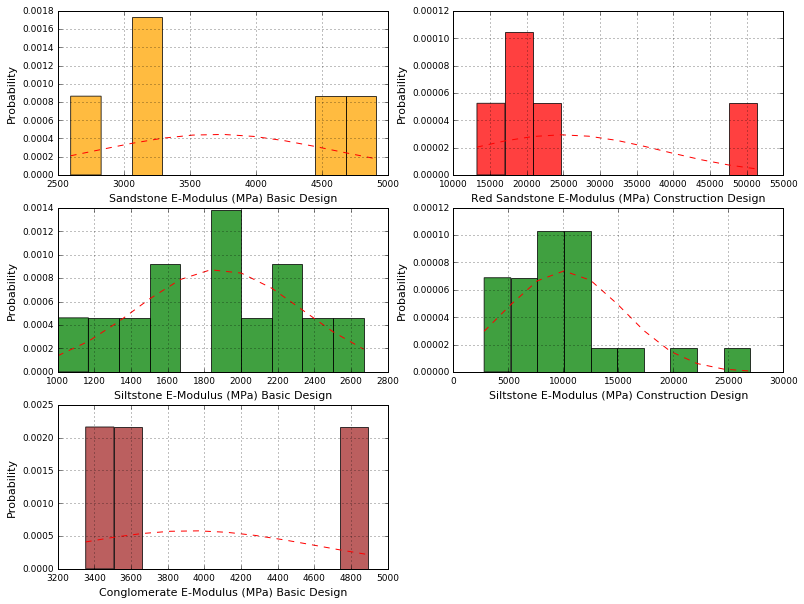

In [788]:
# plot histogram of all E values for selected lithologies 
# input: dict_E_const and dict_E_basic containing 'values' of 'parameter' E 

# define dict for lithology colors
colors={'Red Sandstone':'red', 'Sandstone':'orange', 'Siltstone':'green', 'Conglomerate':'brown', 
        'Mudstone':'yellow' , 'Sheared Mudstone':'magenta', 'Clay':'black'}

def histogram_by_lithology(dict, lithology, sample_description):
  # plot histogram for values of selected lithology
  n, bins, patches = plt.hist(dict[lithology], 10, normed=1, facecolor=colors[lithology], alpha=0.75)

  # plot fitted distribution of data using scipy
  param = norm.fit(dict[lithology]) 
  y = mlab.normpdf( bins, param[0], param[1])
  plt.plot(bins, y, 'r--', linewidth=1)

  plt.ylabel('Probability',fontsize=11)
  plt.xlabel(lithology+' E-Modulus (MPa) '+sample_description,fontsize=11)
  plt.rc('xtick', labelsize=9)
  plt.rc('ytick', labelsize=9)  
  #plt.xlim((0,60000))
  plt.grid(True)
  #plt.text(0.08,0.98, '$\mu$='+str(format(param[0],'.0f')), fontsize=12, transform=ax.transAxes)
  #plt.text(0.08,0.90, '$\sigma$='+str(format(param[1],'.0f')), fontsize=12, transform=ax.transAxes)
  #plt.text(0.08,0.82, str(len(dict[lithology]))+' samples', fontsize=12, transform=ax.transAxes)
    
plt.figure(figsize=(13, 10))
plt.subplot(322)
histogram_by_lithology(dict_E_const, 'Red Sandstone', 'Construction Design')
plt.subplot(324)
histogram_by_lithology(dict_E_const, 'Siltstone', 'Construction Design')
plt.subplot(321)
histogram_by_lithology(dict_E_basic, 'Sandstone', 'Basic Design')
plt.subplot(323)
histogram_by_lithology(dict_E_basic, 'Siltstone', 'Basic Design')
plt.subplot(325)
histogram_by_lithology(dict_E_basic, 'Conglomerate', 'Basic Design')
plt.show()

In [789]:
# prepare sigma_c (uniaxial compression) values for a selected lithologies
# input: data_sigma_c

dict_sigma_c_basic={}
dict_sigma_c_const={}

# select sigma_c data from uniaxial compression testing
data_sigma_c_sel=[]

# select testing results for Uniaxial compression
for item in data_sigma_c:
    if (item['test_type']) == 'Uniaxial compression':
      data_sigma_c_sel.append(item)
print(len(data_sigma_c_sel))

select_by_lithology(data_sigma_c_sel, 'Red Sandstone', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Sandstone', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Siltstone', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Mudstone', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Conglomerate', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Clay', dict_sigma_c_const, 'Construction Design')
select_by_lithology(data_sigma_c_sel, 'Sheared Mudstone', dict_sigma_c_const, 'Construction Design')

select_by_lithology(data_sigma_c_sel, 'Red Sandstone', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Sandstone', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Siltstone', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Mudstone', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Conglomerate', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Clay', dict_sigma_c_basic, 'Basic Design')
select_by_lithology(data_sigma_c_sel, 'Sheared Mudstone', dict_sigma_c_basic, 'Basic Design')

print(dict_sigma_c_const)
print(dict_sigma_c_basic)
print(len(dict_sigma_c_const['Red Sandstone']))
print(len(dict_sigma_c_const['Siltstone']))
print(len(dict_sigma_c_basic['Sandstone']))
print(len(dict_sigma_c_basic['Siltstone']))
print(len(dict_sigma_c_basic['Conglomerate']))

39
{'Sheared Mudstone': [], 'Sandstone': [], 'Red Sandstone': [56.01, 106.68, 78.68, 126.68, 105.35], 'Siltstone': [20.67, 22.04, 19.98, 36.06, 19.29, 8.46, 9.77, 28.93, 28.93, 47.41, 45.9, 50.75, 46.33, 40.88, 39.38, 56.97, 24.67, 19.13, 15.3], 'Conglomerate': [], 'Mudstone': [], 'Clay': []}
{'Sheared Mudstone': [], 'Sandstone': [85.02, 83.3, 56.94, 58.69, 122.15, 118.97], 'Red Sandstone': [], 'Siltstone': [44.02, 53.64, 19.97, 29.78, 7.0, 25.6], 'Conglomerate': [86.82, 75.15, 113.55], 'Mudstone': [], 'Clay': []}
5
19
6
6
3


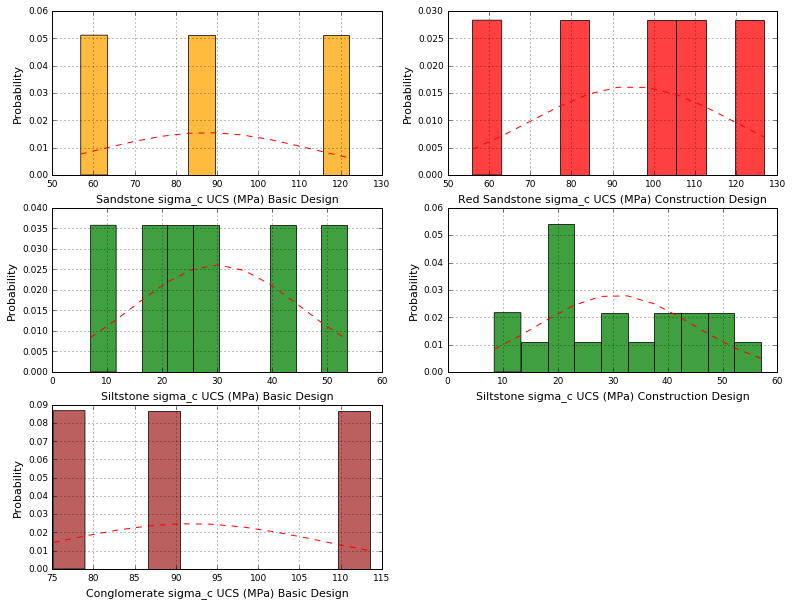

In [790]:
# plot histogram of all sigma_c values for selected lithologies 
# input: dict_sigma_c_const, dict_sigma_c_basic containing 'values' of 'parameter' sigma_c

def histogram_by_lithology(dict, lithology, sample_description):
  # plot histogram for values of selected lithology
  # consider using two vertical axes, one for PDF and one (count) for histograms                          #ToDo JK
  n, bins, patches = plt.hist(dict[lithology], 10, normed=1, facecolor=colors[lithology], alpha=0.75)

  # plot fitted distribution of data using scipy
  param = norm.fit(dict[lithology]) 
  y = mlab.normpdf( bins, param[0], param[1])
  plt.plot(bins, y, 'r--', linewidth=1)

  plt.ylabel('Probability',fontsize=11)
  plt.xlabel(lithology+' sigma_c UCS (MPa) '+sample_description,fontsize=11)
  plt.rc('xtick', labelsize=9)
  plt.rc('ytick', labelsize=9)  
  plt.grid(True)
    
plt.figure(figsize=(13, 10))
plt.subplot(322)
histogram_by_lithology(dict_sigma_c_const, 'Red Sandstone', 'Construction Design')
plt.subplot(324)
histogram_by_lithology(dict_sigma_c_const, 'Siltstone', 'Construction Design')
plt.subplot(321)
histogram_by_lithology(dict_sigma_c_basic, 'Sandstone', 'Basic Design')
plt.subplot(323)
histogram_by_lithology(dict_sigma_c_basic, 'Siltstone', 'Basic Design')
plt.subplot(325)
histogram_by_lithology(dict_sigma_c_basic, 'Conglomerate', 'Basic Design')
plt.show()

## p-q plot for sigma_c and tau data

In [791]:
# prepare sigma_c (uniaxial and triaxial compression) values for selected lithologiea 
# input: data_sigma_c

sigma_c_ucs_basic={}; s3_ucs_basic={}; sigma_c_ucs_const={}; s3_ucs_const={}
sigma_c_tx_basic={};s3_tx_basic={}; sigma_c_tx_const={}; s3_tx_const={}

# select sigma_c data from uniaxial compression testing
data_sigma_c_ucs=[]
for item in data_sigma_c:
    if (item['test_type']) == 'Uniaxial compression':
        data_sigma_c_ucs.append(item)
print('count for selected sigma_c_ucs: '+str(len(data_sigma_c_ucs)))    # record count for checking

# select sigma_c data from triaxial compression testing
data_sigma_c_tx=[]
### JUST A QUICK HACK    
for item in data_sigma_c:
###for item in data_tau:
    if (item['test_type']) == 'Triaxial compression':
    ###if (item['test_type']) == 'Direct shear':
        data_sigma_c_tx.append(item)
print('count for selected sigma_c_tx: '+str(len(data_sigma_c_tx)))    # record count for checking

def select_strength(data, lithology, sigma_c, s3, sample_description):
    sigma_c[lithology]=[]
    s3[lithology]=[]

    # select testing results from Construction Design
    for item in data:
        if (item['value']) != 'NaN':
            if (item['sample_description']) == sample_description:
                if (item['lithology']) == lithology:
                    sigma_c[lithology].append(float(item['value']))
                    try: 
                        float(item['test_parameters']) 
                        s3[lithology].append(float(item['test_parameters']))
                    except:
                        # set 'test_parameter' = 0 if it is not specified
                        s3[lithology].append(float(0))
                        
# do this just by looping!                                                                                 #ToDo JK
select_strength(data_sigma_c_ucs, 'Red Sandstone', sigma_c_ucs_const, s3_ucs_const, 'Construction Design')
select_strength(data_sigma_c_ucs, 'Sandstone', sigma_c_ucs_const, s3_ucs_const, 'Construction Design')
select_strength(data_sigma_c_ucs, 'Siltstone', sigma_c_ucs_const, s3_ucs_const, 'Construction Design')
select_strength(data_sigma_c_ucs, 'Mudstone', sigma_c_ucs_const, s3_ucs_const, 'Construction Design')
select_strength(data_sigma_c_ucs, 'Conglomerate', sigma_c_ucs_const, s3_ucs_const, 'Construction Design')
select_strength(data_sigma_c_ucs, 'Clay', sigma_c_ucs_const, s3_ucs_const, 'Construction Design')
select_strength(data_sigma_c_ucs, 'Sheared Mudstone', sigma_c_ucs_const, s3_ucs_const, 'Construction Design')

select_strength(data_sigma_c_ucs, 'Red Sandstone', sigma_c_ucs_basic, s3_ucs_basic, 'Basic Design')
select_strength(data_sigma_c_ucs, 'Sandstone', sigma_c_ucs_basic, s3_ucs_basic, 'Basic Design')
select_strength(data_sigma_c_ucs, 'Siltstone', sigma_c_ucs_basic, s3_ucs_basic, 'Basic Design')
select_strength(data_sigma_c_ucs, 'Mudstone', sigma_c_ucs_basic, s3_ucs_basic, 'Basic Design')
select_strength(data_sigma_c_ucs, 'Conglomerate', sigma_c_ucs_basic, s3_ucs_basic, 'Basic Design')
select_strength(data_sigma_c_ucs, 'Clay', sigma_c_ucs_basic, s3_ucs_basic, 'Basic Design')
select_strength(data_sigma_c_ucs, 'Sheared Mudstone', sigma_c_ucs_basic, s3_ucs_basic, 'Basic Design')

select_strength(data_sigma_c_tx, 'Red Sandstone', sigma_c_tx_const, s3_tx_const, 'Construction Design')
select_strength(data_sigma_c_tx, 'Sandstone', sigma_c_tx_const, s3_tx_const, 'Construction Design')
select_strength(data_sigma_c_tx, 'Siltstone', sigma_c_tx_const, s3_tx_const, 'Construction Design')
select_strength(data_sigma_c_tx, 'Mudstone', sigma_c_tx_const, s3_tx_const, 'Construction Design')
select_strength(data_sigma_c_tx, 'Conglomerate', sigma_c_tx_const, s3_tx_const, 'Construction Design')
select_strength(data_sigma_c_tx, 'Clay', sigma_c_tx_const, s3_tx_const, 'Construction Design')
select_strength(data_sigma_c_tx, 'Sheared Mudstone', sigma_c_tx_const, s3_tx_const, 'Construction Design')

select_strength(data_sigma_c_tx, 'Red Sandstone', sigma_c_tx_basic, s3_tx_basic, 'Basic Design')
select_strength(data_sigma_c_tx, 'Sandstone', sigma_c_tx_basic, s3_tx_basic, 'Basic Design')
select_strength(data_sigma_c_tx, 'Siltstone', sigma_c_tx_basic, s3_tx_basic, 'Basic Design')
select_strength(data_sigma_c_tx, 'Mudstone', sigma_c_tx_basic, s3_tx_basic, 'Basic Design')
select_strength(data_sigma_c_tx, 'Conglomerate', sigma_c_tx_basic, s3_tx_basic, 'Basic Design')
select_strength(data_sigma_c_tx, 'Clay', sigma_c_tx_basic, s3_tx_basic, 'Basic Design')
select_strength(data_sigma_c_tx, 'Sheared Mudstone', sigma_c_tx_basic, s3_tx_basic, 'Basic Design')

print(sigma_c_ucs_const)
print(s3_ucs_const)
print(sigma_c_ucs_basic)
print(s3_ucs_basic)
print(len(sigma_c_ucs_const['Red Sandstone']))
print(len(sigma_c_ucs_const['Sandstone']))
print(len(sigma_c_ucs_const['Siltstone']))
print(len(sigma_c_ucs_const['Mudstone']))
print(len(sigma_c_ucs_const['Conglomerate']))
print(len(sigma_c_ucs_const['Clay']))
print(len(sigma_c_ucs_const['Sheared Mudstone']))

print(sigma_c_tx_const)
print(s3_tx_const)
print(sigma_c_tx_basic)
print(s3_tx_basic)
print(len(sigma_c_tx_const['Red Sandstone']))
print(len(sigma_c_tx_const['Sandstone']))
print(len(sigma_c_tx_const['Siltstone']))
print(len(sigma_c_tx_const['Mudstone']))
print(len(sigma_c_tx_const['Conglomerate']))
print(len(sigma_c_tx_const['Clay']))
print(len(sigma_c_tx_const['Sheared Mudstone']))

count for selected sigma_c_ucs: 39
count for selected sigma_c_tx: 21
{'Sheared Mudstone': [], 'Sandstone': [], 'Red Sandstone': [56.01, 106.68, 78.68, 126.68, 105.35], 'Siltstone': [20.67, 22.04, 19.98, 36.06, 19.29, 8.46, 9.77, 28.93, 28.93, 47.41, 45.9, 50.75, 46.33, 40.88, 39.38, 56.97, 24.67, 19.13, 15.3], 'Conglomerate': [], 'Mudstone': [], 'Clay': []}
{'Sheared Mudstone': [], 'Sandstone': [], 'Red Sandstone': [0.0, 0.0, 0.0, 0.0, 0.0], 'Siltstone': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Conglomerate': [], 'Mudstone': [], 'Clay': []}
{'Sheared Mudstone': [], 'Sandstone': [85.02, 83.3, 56.94, 58.69, 122.15, 118.97], 'Red Sandstone': [], 'Siltstone': [44.02, 53.64, 19.97, 29.78, 7.0, 25.6], 'Conglomerate': [86.82, 75.15, 113.55], 'Mudstone': [], 'Clay': []}
{'Sheared Mudstone': [], 'Sandstone': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Red Sandstone': [], 'Siltstone': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Conglomerate': [0.0, 0.0, 0.0], '

[ 28.005  53.34   39.34   63.34   52.675]
[ 28.005  53.34   39.34   63.34   52.675]
[]
[]
[ 10.335  11.02    9.99   18.03    9.645   4.23    4.885  14.465  14.465
  23.705  22.95   25.375  23.165  20.44   19.69   28.485  12.335   9.565
   7.65 ]
[ 10.335  11.02    9.99   18.03    9.645   4.23    4.885  14.465  14.465
  23.705  22.95   25.375  23.165  20.44   19.69   28.485  12.335   9.565
   7.65 ]
[]
[]
[ 65.085  66.775  45.77   45.04   32.29   55.715]
[ 62.085  61.775  44.77   42.04   31.29   50.715]
[]
[]
[ 38.82   42.585  26.765  37.055  30.53   30.   ]
[ 35.82   37.585  25.765  32.055  27.53   29.   ]
[]
[]
[]
[]
[]
[]
[]
[]


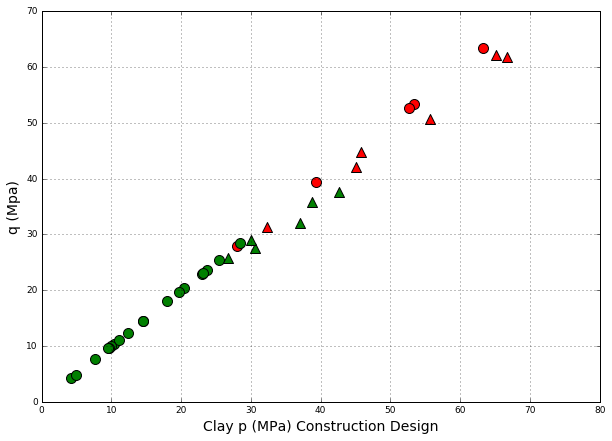

In [792]:
# p-q plot for sigma_c and tau data for all rock lithologies                                          
# color data points by lithology                                                                            ToDo JK
# show different plots for basic and construction design                                                    ToDo JK
# input: sigma_c..., s3... containing 'values' of 'parameter' and 'test_parameters'

# p-q plot
def pq_by_lithology(sigma_c, s3, lithology, sample_description):
# p-q plot for values of selected lithology
  sigma_c_ = np.array(sigma_c[lithology])
  s3_ = np.array(s3[lithology])
  print((sigma_c_ + s3_)/2.)
  print((sigma_c_ - s3_)/2.)
  plt.scatter(((sigma_c_ + s3_)/2.),((sigma_c_ - s3_)/2.),marker='o',s= 100.,facecolor=colors[lithology],)

  plt.ylabel('q (Mpa)')
  plt.xlabel(lithology+' p (MPa) '+sample_description)
  plt.grid(True)


plt.figure(figsize=(10, 7))
plt.subplot(111)


pq_by_lithology(sigma_c_ucs_const, s3_ucs_const,'Red Sandstone', 'Construction Design')
pq_by_lithology(sigma_c_ucs_const, s3_ucs_const,'Sandstone', 'Construction Design',)
pq_by_lithology(sigma_c_ucs_const, s3_ucs_const,'Siltstone', 'Construction Design',)
pq_by_lithology(sigma_c_ucs_const, s3_ucs_const,'Conglomerate', 'Construction Design',)

def pq_by_lithology(sigma_c, s3, lithology, sample_description):
# p-q plot for values of selected lithology
  sigma_c_ = np.array(sigma_c[lithology])
  s3_ = np.array(s3[lithology])
  print((sigma_c_ + s3_)/2.)
  print((sigma_c_ - s3_)/2.)
  plt.scatter(((sigma_c_ + s3_)/2.),((sigma_c_ - s3_)/2.),marker='^',s= 100.,facecolor=colors[lithology],)

  plt.ylabel('q (Mpa)',fontsize=14)
  plt.xlabel(lithology+' p (MPa) '+sample_description,fontsize=14)
  plt.grid(True)
  #plt.xlim((0,80))
  #plt.ylim((0,80))


# easier to just loop through lithologies (everywhere)!                                                               #ToDo JK
pq_by_lithology(sigma_c_tx_const, s3_tx_const,'Red Sandstone', 'Construction Design')
pq_by_lithology(sigma_c_tx_const, s3_tx_const,'Sandstone', 'Construction Design',)
pq_by_lithology(sigma_c_tx_const, s3_tx_const,'Siltstone', 'Construction Design',)
pq_by_lithology(sigma_c_tx_const, s3_tx_const,'Conglomerate', 'Construction Design',)
pq_by_lithology(sigma_c_tx_const, s3_tx_const,'Mudstone', 'Construction Design')
pq_by_lithology(sigma_c_tx_const, s3_tx_const,'Sheared Mudstone', 'Construction Design',)
pq_by_lithology(sigma_c_tx_const, s3_tx_const,'Clay', 'Construction Design',)



# legend
##sym1 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="orange")
##sym2 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="black")
##sym3 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="blue")
##sym4 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="gray")
##sym5 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="green")
##plt.legend((sym1,sym2,sym3,sym4,sym5),("Sandstone","Diorite","Pegmatite","Granodiorite","Sericite"),
##           numpoints=1,loc="best")

# axis labels
##plt.ylabel('sigma_c (MPa)')
##plt.xlabel('E-Modulus[E50] (MPa)')
##plt.plot((2000,20000,40000,60000),(10,100,200,300), color="gray")

# a reference trend line
##plt.annotate("200:1",xy=(50000,250),xytext=(50000,285),rotation=35)

plt.show()

In [793]:
# select sigma_c (uniaxial and triaxial compression) and tau (direct shear) values for selected lithologies
# sample_desciption is being used to store construction phase (should be added to parameter metadata)     # ToDo JK 

tests={'ucs':data_sigma_c,'tx':data_sigma_c,'ds':data_tau}  #test types and input data for each test type
test_names={'ucs':'Uniaxial compression','tx':'Triaxial compression','ds':'Direct shear'}  #for selecting test_type
lithologies=('Red Sandstone','Sandstone','Siltstone','Conglomerate','Mudstone','Sheared Mudstone','Clay')
sig1_const = {'ucs': {}, 'tx': {}, 'ds': {}}; sig3_const = {'ucs': {}, 'tx': {}, 'ds': {}}  #dictionaries
sig1_basic = {'ucs': {}, 'tx': {}, 'ds': {}}; sig3_basic = {'ucs': {}, 'tx': {}, 'ds': {}}  #dictionaries

# select strength data from test results and write to dictionary
def selected_stengths(sample_description, sig1, sig3):
    for key,value in tests.items():  #loop over test types (=key)
        for lithology in lithologies:
            sig1[key][lithology]=[]  #initialize dictionary
            sig3[key][lithology]=[]  #initialize dictionary
        for rec in value:  #for each record of input data
            if (rec['test_type']) == test_names[key]: #select for test type 
                if (rec['value']) != 'NaN':  #ignore NaN values
                    if (rec['sample_description']) == sample_description:  #select for construction phase
                        for lithology in lithologies:  # select for lithology
                            if (rec['lithology']) == lithology:
                                sig1[key][lithology].append(float(rec['value']))
                                try: 
                                    float(rec['test_parameters']) 
                                    sig3[key][lithology].append(float(rec['test_parameters']))
                                except:
                                    sig3[key][lithology].append(float(0))  #set 'test_parameter' = 0 if missing
                                
selected_stengths('Construction Design', sig1_const, sig3_const)            

def count_selected_stengths(sig1):  #counts for data checking
    for item in sig1: 
        count=0
        for lithology,value in sig1[item].items():
            item_len = len(sig1[item][lithology])
            count = count + item_len
            if item_len > 1:
                print('count for selected '+str(item)+' in '+str(lithology)+': '+str(item_len))
        print ('    count for selected '+str(item)+': '+str(count)) 

count_selected_stengths(sig1_const)

#print sig1_const['ucs']['Siltstone']
#print sig1_const['tx']
#print sig3_const['tx']

count for selected ucs in Red Sandstone: 5
count for selected ucs in Siltstone: 19
    count for selected ucs: 24
count for selected ds in Sheared Mudstone: 12
count for selected ds in Sandstone: 6
count for selected ds in Siltstone: 12
count for selected ds in Clay: 6
    count for selected ds: 36
count for selected tx in Red Sandstone: 6
count for selected tx in Siltstone: 6
    count for selected tx: 12


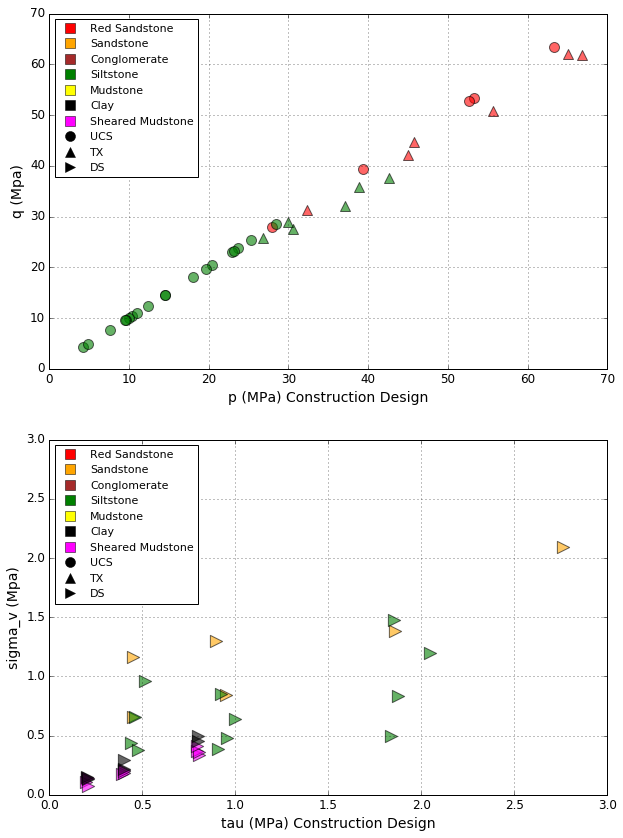

In [798]:
# p-q plot for sigma_c and tau data for all rock lithologies                                          
# show different plots for basic and construction design                                                    ToDo JK
# input: sig1..., sig3... containing 'values' of 'parameter' and 'test_parameters'

markers={'ucs':'o', 'tx':'^', 'ds':'>'} 

def legend():    
# legend
    sym1 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="red")
    sym2 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="orange")
    sym3 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="brown")
    sym4 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="green")
    sym5 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="yellow")
    sym6 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="black")
    sym7 = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, color="magenta")
    sym10 = Line2D([0], [0], linestyle="none", marker="o", alpha=1.0, markersize=10, color="black")
    sym11 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, markersize=10, color="black")
    sym12 = Line2D([0], [0], linestyle="none", marker=">", alpha=1.0, markersize=10, color="black")
    plt.legend((sym1,sym2,sym3,sym4,sym5,sym6,sym7,sym10,sym11,sym12),
           ("Red Sandstone","Sandstone","Conglomerate","Siltstone","Mudstone","Clay","Sheared Mudstone",
            "UCS","TX","DS"),fontsize=11, numpoints=1,loc="upper left")

def rand_jitter(arr):
    if not arr.any():
        pass
    else:
        stdev = .01*(max(arr)-min(arr))
        return arr + np.random.randn(len(arr)) * stdev

def pq_plot(sig1, sig3, lithology, test, sample_description):
# p-q plot for values of selected lithology
    sig1_ = np.array(sig1[lithology])
    sig3_ = np.array(sig3[lithology])
    if test=='ucs' or test=='tx':
        plt.scatter(((sig1_ + sig3_)/2.),((sig1_ - sig3_)/2.),
                    marker=markers[test],s= 100.,facecolor=colors[lithology],alpha=0.6)
    if test=='ds':
        plt.scatter(rand_jitter(sig3_),rand_jitter(sig1_),
                    marker=markers[test],s= 150.,facecolor=colors[lithology],alpha=0.6)

    plt.ylabel('q (Mpa)',fontsize=14)
    plt.xlabel('p (MPa) '+sample_description,fontsize=14)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.grid(True)

plt.figure(figsize=(10, 14))

plt.subplot(211)
plt.xlim((0,70))
plt.ylim((0,70))
for lithology in lithologies:
    pq_plot(sig1_const['ucs'], sig3_const['ucs'],lithology,'ucs','Construction Design')
for lithology in lithologies:
    pq_plot(sig1_const['tx'], sig3_const['tx'],lithology,'tx','Construction Design')
legend()

plt.subplot(212)
plt.xlim((0,3))
plt.ylim((0,3))
for lithology in lithologies:
    pq_plot(sig1_const['ds'], sig3_const['ds'],lithology,'ds','Construction Design') 
plt.ylabel('sigma_v (Mpa)',fontsize=14)
plt.xlabel('tau (MPa) Construction Design',fontsize=14)
legend()    

plt.show()

## Scatterplot of E50 vs sigma_c data

In [795]:
# remove records for sigma_c if no record for E at the sample_depth, for scatterplot
# note: it is not yet checked if there are E values with no record for sigma_c at the sample_depth
# input: data_sigma_c

data_sigma_c_adj = []  # adjusted list
i=0

#for item in nem_data_sigma_c:
for item in data_sigma_c:
    # check if a record exists with an E value at the sample_depth of the item
    # and append to the adjusted list if record exists 
    if any(d['sample_depth_top_m'] == (data_sigma_c[i]['sample_depth_top_m']) for d in data_E):
        #print data_sigma_c[i]['borehole_code']
        #add if test_type = 'Uniaxial compression' (and add similar adjustment for E)                 #ToDo  JK
        data_sigma_c_adj.append(item)
        i+=1
    else:
        i=1+i
        pass

In [796]:
# data report
# input: data_sigma_c_adj

data_sigma_c_adj_df = pd.DataFrame(data=data_sigma_c_adj)

# display data_sigma_c_adj_df as html using pandas df.to_html()
display(HTML('<h4>Adjusted NT1 data - sigma_c </h4>'))
data_sigma_c_adj_df.columns = [u'Borehole', u'Lithology', u'Depth', u'Sample', u's3', u'Test', u'Value', u'Unit']
display(HTML(data_sigma_c_adj_df.to_html()))

,Borehole,Lithology,Depth,Sample,s3,Test,Value,Unit
0,NT1-1,Conglomerate,27.10,Basic Design,,Uniaxial compression,86.82,MPa
1,NT1-1,Conglomerate,61.50,Basic Design,,Uniaxial compression,75.15,MPa
2,NT1-11,Sandstone,15.65,Basic Design,,Uniaxial compression,85.02,MPa
3,NT1-14,Red Sandstone,28.90,Construction Design,3.00,Triaxial compression,127.17,MPa
4,NT1-14,Red Sandstone,28.90,Construction Design,5.00,Triaxial compression,128.55,MPa
5,NT1-14,Red Sandstone,28.90,Construction Design,,Uniaxial compression,56.01,MPa
6,NT1-14,Red Sandstone,28.90,Construction Design,1.00,Triaxial compression,90.54,MPa
7,NT1-14,Red Sandstone,36.80,Construction Design,,Uniaxial compression,106.68,MPa
8,NT1-14,Red Sandstone,37.30,Construction Design,,Uniaxial compression,78.68,MPa
9,NT1-14,Red Sandstone,37.30,Construction Design,,Uniaxial compression,126.68,MPa


In [797]:
# prepare sigma_c values for scatterplot 
# input: nem_data_sigma-c

data_sigma_c=[]

for item in nem_data_sigma_c_s_adj:
    data_sigma_c.append(item['value'])
    
#print data_sigma_c
print len(data_sigma_c)

NameError: name 'nem_data_sigma_c_s_adj' is not defined

In [ ]:
# check data and prepare scatterplot

# check number or records same for all data lists
print(len(data_e))
print(len(data_sigma_c))   
print(len(data_lithology))

# assign colors to lithologies for use in scatterplot
colors=[]
for i in range(0,len(data_lithology)):
    if data_lithology[i]=='Sandstone':
        colors.append('orange')
    elif data_lithology[i]=='Diorite':
        colors.append('black')
    elif data_lithology[i]=='Pegmatite':
        colors.append('blue')
    elif data_lithology[i]=='Granodiorite':
        colors.append('gray')
    elif data_lithology[i]=='Sericite':
        colors.append('green')
    else:
        colors.append('red')
        
#print(colors)

In [ ]:
# scatterplot of E50 against sigma_c for all rock lithologies
# input: data_e, data_sigma_c containing 'values' of 'parameter' E and sigma_c
#        colors containg list of colors for lithologies in records (colors previously assigned lithologies)

# scatterplot
rock_plot=plt.scatter([data_e],[data_sigma_c],color=colors,marker='^')

# legend
sym1 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="orange")
sym2 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="black")
sym3 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="blue")
sym4 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="gray")
sym5 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="green")
plt.legend((sym1,sym2,sym3,sym4,sym5),("Sandstone","Diorite","Pegmatite","Granodiorite","Sericite"),
           numpoints=1,loc="best")

# axis labels
plt.ylabel('sigma_c (MPa)')
plt.xlabel('E-Modulus[E50] (MPa)')
plt.plot((2000,20000,40000,60000),(10,100,200,300), color="gray")

# a reference trend line
plt.annotate("200:1",xy=(50000,250),xytext=(50000,285),rotation=35)

plt.show()